In [1]:
import os
import sys

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
import webbpsf
from webbpsf import roman

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo, psf, gs

In [2]:
# os.environ["WEBBPSF_PATH"] = "/data/bwedig/STScI/webbpsf-data"
# os.environ["pandeia_refdata"] = "/data/bwedig/STScI/ref_data/pandeia_data-3.1_roman"

Attempted to get aberrations at field point (4, 4) which is outside the range of the reference data; approximating to nearest interpolated point (3.9904546744231357, 43.00220030706667)
Attempted to get aberrations at field point (4, 4) which is outside the range of the reference data; approximating to nearest interpolated point (3.9904546744231357, 43.00220030706667)
Attempted to get aberrations at field point (4, 4) which is outside the range of the reference data; approximating to nearest interpolated point (3.9904546744231357, 43.00220030706667)
Attempted to get aberrations at field point (4, 4) which is outside the range of the reference data; approximating to nearest interpolated point (3.9904546744231357, 43.00220030706667)
Attempted to get aberrations at field point (4, 4) which is outside the range of the reference data; approximating to nearest interpolated point (3.9904546744231357, 43.00220030706667)
Attempted to get aberrations at field point (4, 4) which is outside the ran

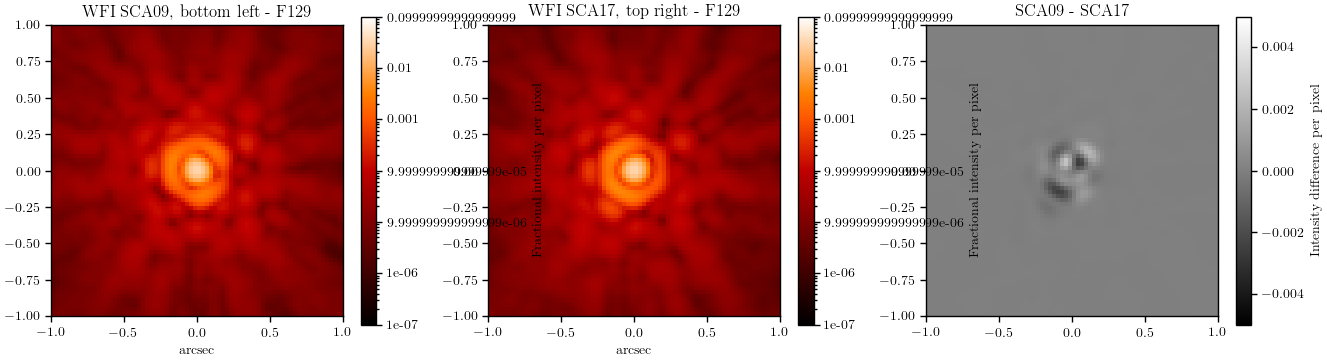

In [3]:
wfi = roman.WFI()
wfi.filter = 'F129'
wfi.detector = 'SCA09'
wfi.detector_position = (4, 4)
psf_sca09 = wfi.calc_psf()
wfi.detector = 'SCA17'
wfi.detector_position = (4092, 4092)
psf_sca17 = wfi.calc_psf()
fig, (ax_sca09, ax_sca17, ax_diff) = plt.subplots(1, 3, figsize=(16, 4))
webbpsf.display_psf(psf_sca09, ax=ax_sca09, imagecrop=2.0,
                        title='WFI SCA09, bottom left - F129')
webbpsf.display_psf(psf_sca17, ax=ax_sca17, imagecrop=2.0,
                        title='WFI SCA17, top right - F129')
webbpsf.display_psf_difference(psf_sca09, psf_sca17, ax=ax_diff,
                                    vmax=5e-3, title='SCA09 - SCA17', imagecrop=2.0)

In [4]:
wfi = roman.WFI()
outfile = os.path.join(repo_dir, 'wfi_sca01.fits')
psf_sca01 = wfi.calc_psf(outfile=outfile)

In [5]:
from astropy.io import fits
fits.info(outfile)

Filename: /home/btwedig/mejiro/wfi_sca01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  OVERSAMP      1 PrimaryHDU      72   (180, 180)   float64   
  1  DET_SAMP      1 ImageHDU        73   (45, 45)   float64   
  2  OVERDIST      1 ImageHDU       116   (180, 180)   float64   
  3  DET_DIST      1 ImageHDU       117   (45, 45)   float64   


In [7]:
data, hdr = fits.getdata(outfile, 1, header=True)

In [9]:
from pprint import pprint
pprint(hdr)

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   45                                                  
NAXIS2  =                   45                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
PLANE1  = 'Wavefront Intensity'                                                 
WAVELEN = 6.35575949064717E-07 / Weighted mean wavelength in meters             
DIFFLMT =  0.04180862663447791 / Diffraction limit lambda/D in arcsec           
OVERSAMP=                    1 / These data are rebinned to detector pixels     
DET_SAMP=                    4 / Oversampling factor for MFT to detector plane  
PIXELSCL=                 0.